In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [54]:
filename = './data/linear.csv'

In [55]:
data_df= pd.read_csv(filename)
data_df.shape

(102, 2)

In [56]:
#Check for missing or null values
data_df.isnull().sum()
data_df = data_df.dropna(how='any')

In [57]:
data_df.isnull().sum()
data_df.head()

,x,y
0,0.000000,-51.000000
1,25.000000,-12.000000
2,117.583220,134.907414
3,108.922466,134.085179
5,96.839983,114.530638


In [58]:
#Spearte X and Y
X = data_df.loc[:,['x']].values  #X as a numpy array
X.shape

(94, 1)

In [59]:
Y = data_df.loc[:,'y'].values  #Y as a series 
Y.shape

(94,)

## Linear Regression

In [60]:
reg=LinearRegression(fit_intercept=True).fit(X,Y)

In [61]:
reg.predict(X[0:10])  #predictions on the data given

array([-50.99119328, -11.39905237, 135.223663  , 121.50775193,
       102.37289634,  31.0056196 ,   4.46431068,  74.84474012,
        20.82088826,  72.16749711])

In [62]:
score= reg.score(X,Y)  #fitting score

In [63]:
print(f'coef: {reg.coef_} intercept: {reg.intercept_}')   #slope and intercept for the line

coef: [1.58368564] intercept: -50.99119328333401


In [64]:
plt.title

<function matplotlib.pyplot.title(label, fontdict=None, loc='center', pad=None, **kwargs)>

Text(0.5, 1.0, 'Linear Regression Line with Intercept y = 1.58x + -50.99 (R2 = 0.98)')

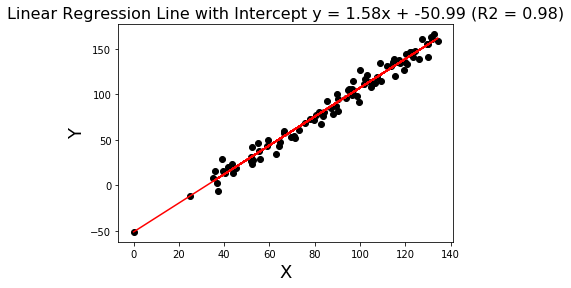

In [65]:
plt.scatter(X,Y, color='black')
plt.plot(X, reg.predict(X), color='red')#,linewidth=3);
plt.tick_params(labelsize = 10)
plt.xlabel('X', fontsize = 18)
plt.ylabel('Y', fontsize = 18)
plt.title("Linear Regression Line with Intercept y = {:.2f}x + {:.2f} (R2 = {:.2f})".format(reg.coef_[0], reg.intercept_, score), fontsize = 16 )

In [74]:
#Housing Price Prediction problem
#Imports
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split


In [75]:
data_boston = load_boston()
data_boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [76]:
data_boston_df= pd.DataFrame(data_boston['data'],columns=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
        'TAX', 'PTRATIO', 'B', 'LSTAT'])

In [78]:
data_boston_df['PRICE'] = data_boston['target']

In [79]:
data_boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [80]:
data_boston_df.shape

(506, 14)

In [82]:
#Check for Null
    #data_boston_df.isnull().sum()

In [94]:
#X and Y
features=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD','TAX', 'PTRATIO', 'B', 'LSTAT']
X= data_boston_df.loc[:, features].values
Y= data_boston_df.loc[:, 'PRICE'].values

In [95]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=3)

In [104]:
len(Y_test)

127

In [96]:
reg_pricing=LinearRegression(fit_intercept=True).fit(X_train,Y_train)

In [105]:
score_train= reg_pricing.score(X_train,Y_train)
score_train

0.7280659533306794

In [107]:
score_test = reg_pricing.score(X_test,Y_test) 
score_test

0.7668895327325096